# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Обратите внимание: в этом и во всех последующих дз за написание неоптимального кода баллы могут быть снижены. Это, в частности, относится к случаям, когда что-то можно сделать при помощи инструментов библиотек и не использовать циклы. Если вам совсем непонятно, как оптимально решить то или иное задание, посоветуйтесь с вашими семинаристами или ассистентами.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [3]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [5]:
Data.shape

(891, 12)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [6]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [7]:
Data["Sex"].value_counts()

,count
Sex,
male,574
female,312
unknown,5


**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [8]:
Data = Data[Data["Sex"] != "unknown"]

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать?

**Задание 5.** Придумайте кодировку и сделайте её.

In [9]:
Data["Sex"] = Data.apply(lambda row: 1 if row.Sex == "male" else 0, axis=1)

<ipython-input-9-c2a103f5aeef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Sex"] = Data.apply(lambda row: 1 if row.Sex == "male" else 0, axis=1)


Посмотрим, как влияет пол на выживаемость.

<ipython-input-10-a922891d4227>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')


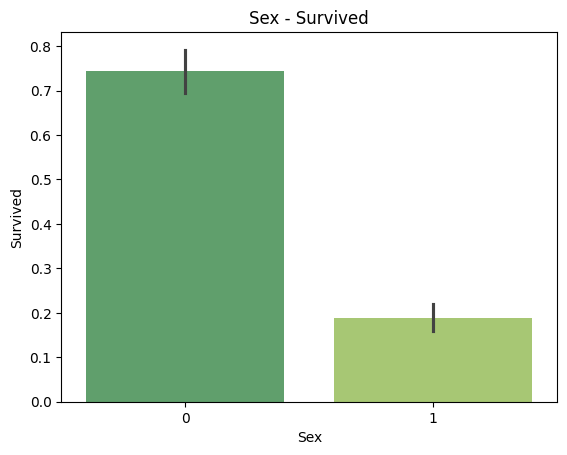

In [10]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

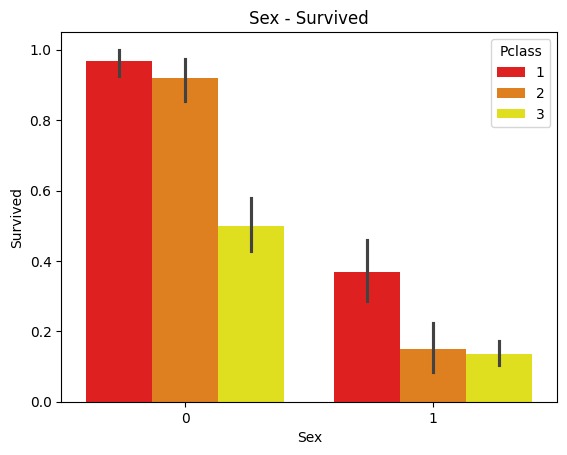

In [11]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

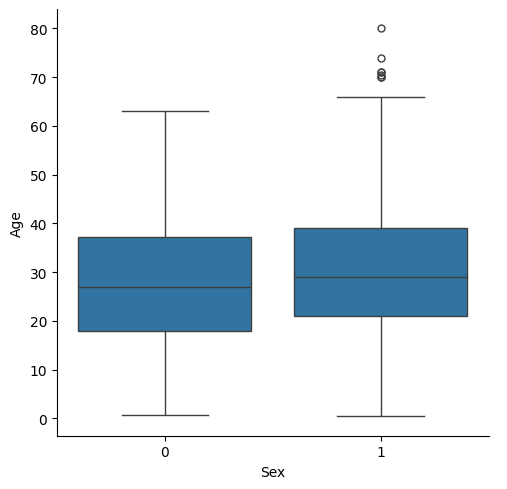

In [12]:
sns.catplot(x="Sex", y="Age", data=Data, kind="box")
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

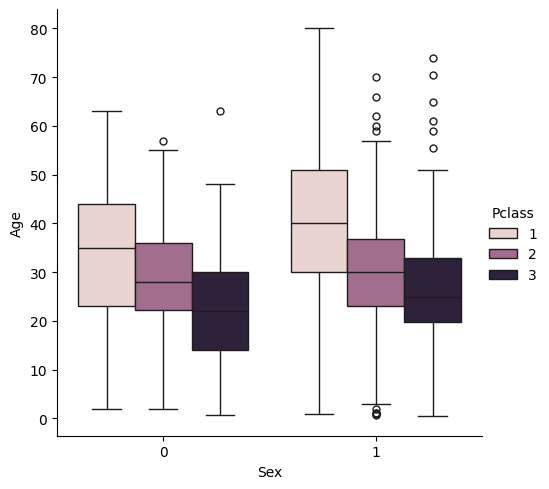

In [13]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [14]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

Embarked
S      641
C      168
Q       75
NaN      2
Name: count, dtype: int64


(886, 12)

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [15]:
Data = Data[Data["Embarked"].notna()]

Переведем категориальный столбец в числовые с помощью OneHotEncoding, а именно, создадим три числовых столбца следующим образом:

In [16]:
# Data['EmbS'] = Data.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
# Data['EmbC'] = Data.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
# Data['EmbQ'] = Data.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

Эту операцию можно сделать с помощью метода get_dummies.

In [17]:
Data_temp = pd.get_dummies(Data['Embarked'])
Data_temp

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


**Задание 7.** Удалите из таблицы Data категориальный столбец Embarked и добавьте в неё новые столбцы, полученные с помощью get_dummies.

In [18]:
Data = pd.concat([Data, Data_temp], axis=1)
Data = Data.drop("Embarked", axis=1)


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [19]:
Data["Age"].value_counts(dropna=False)

,count
Age,
NaN,175
24.0,30
22.0,27
30.0,25
19.0,25
...,...
66.0,1
14.5,1
20.5,1


Заполним пропуски медианным значением Age.

In [20]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,1,27.0,0,0,211536,13.0000,NaN,False,False,True
887,888,1,1,Graham; Miss. Margaret Edith,0,19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,Behr; Mr. Karl Howell,1,26.0,0,0,111369,30.0000,C148,True,False,False


Нарисуем распределение возраста пассажиров.

<ipython-input-21-a33a699fed2d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Age'], kde=False)


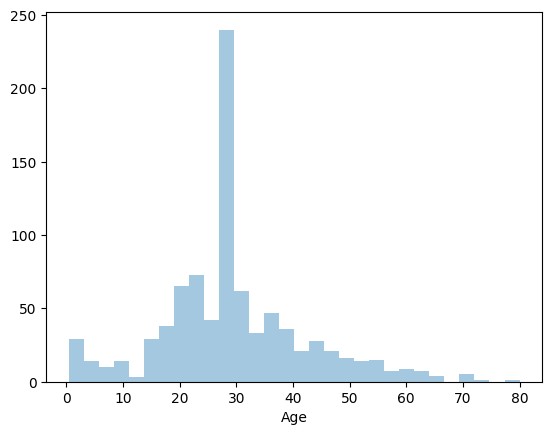

In [21]:
sns.distplot(Data['Age'], kde=False)
plt.show()

Посмотрим на распределение Pclass по возрастам.

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [22]:
median_fare = Data["Fare"].median()
Data["Fare"].fillna(median_fare, inplace = True)

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [23]:
Data['Pclass'].value_counts(dropna=False)

,count
Pclass,
3,487
1,214
2,183


**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

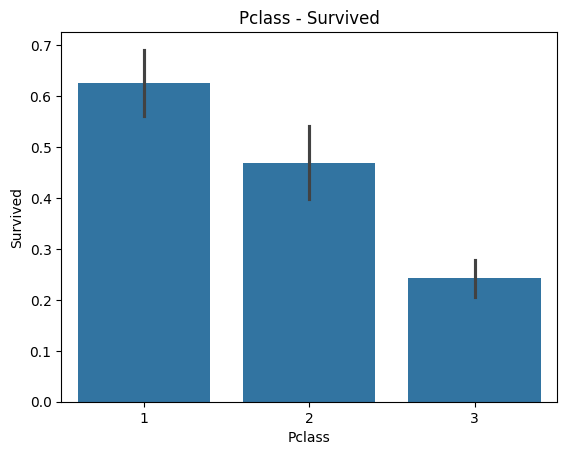

In [24]:
sns.barplot(x = "Pclass", y = "Survived", data=Data)
plt.title("Pclass - Survived")
plt.show()

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [25]:
Data['SibSp'].value_counts(dropna=False)

,count
SibSp,
0,603
1,207
2,28
4,18
3,16
8,7
5,5


**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [26]:
Data['Parch'].value_counts(dropna=False)

,count
Parch,
0,673
1,118
2,79
3,5
5,4
4,4
6,1


**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [27]:
Data = Data.drop("PassengerId", axis=1)

# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной.

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [28]:
#your code here

NumericData = Data.select_dtypes(include=np.number)

<Axes: title={'center': 'Pearson Correlation of Features'}>

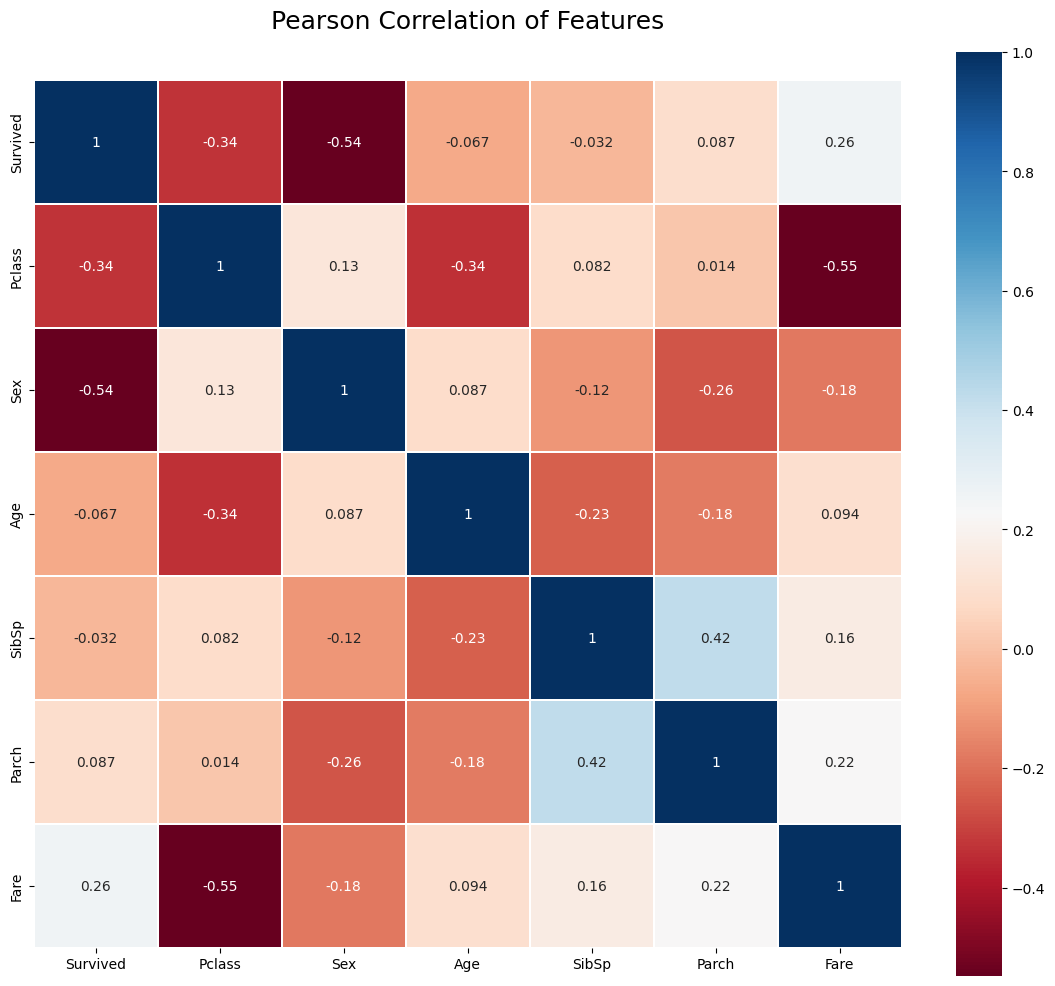

In [29]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/a

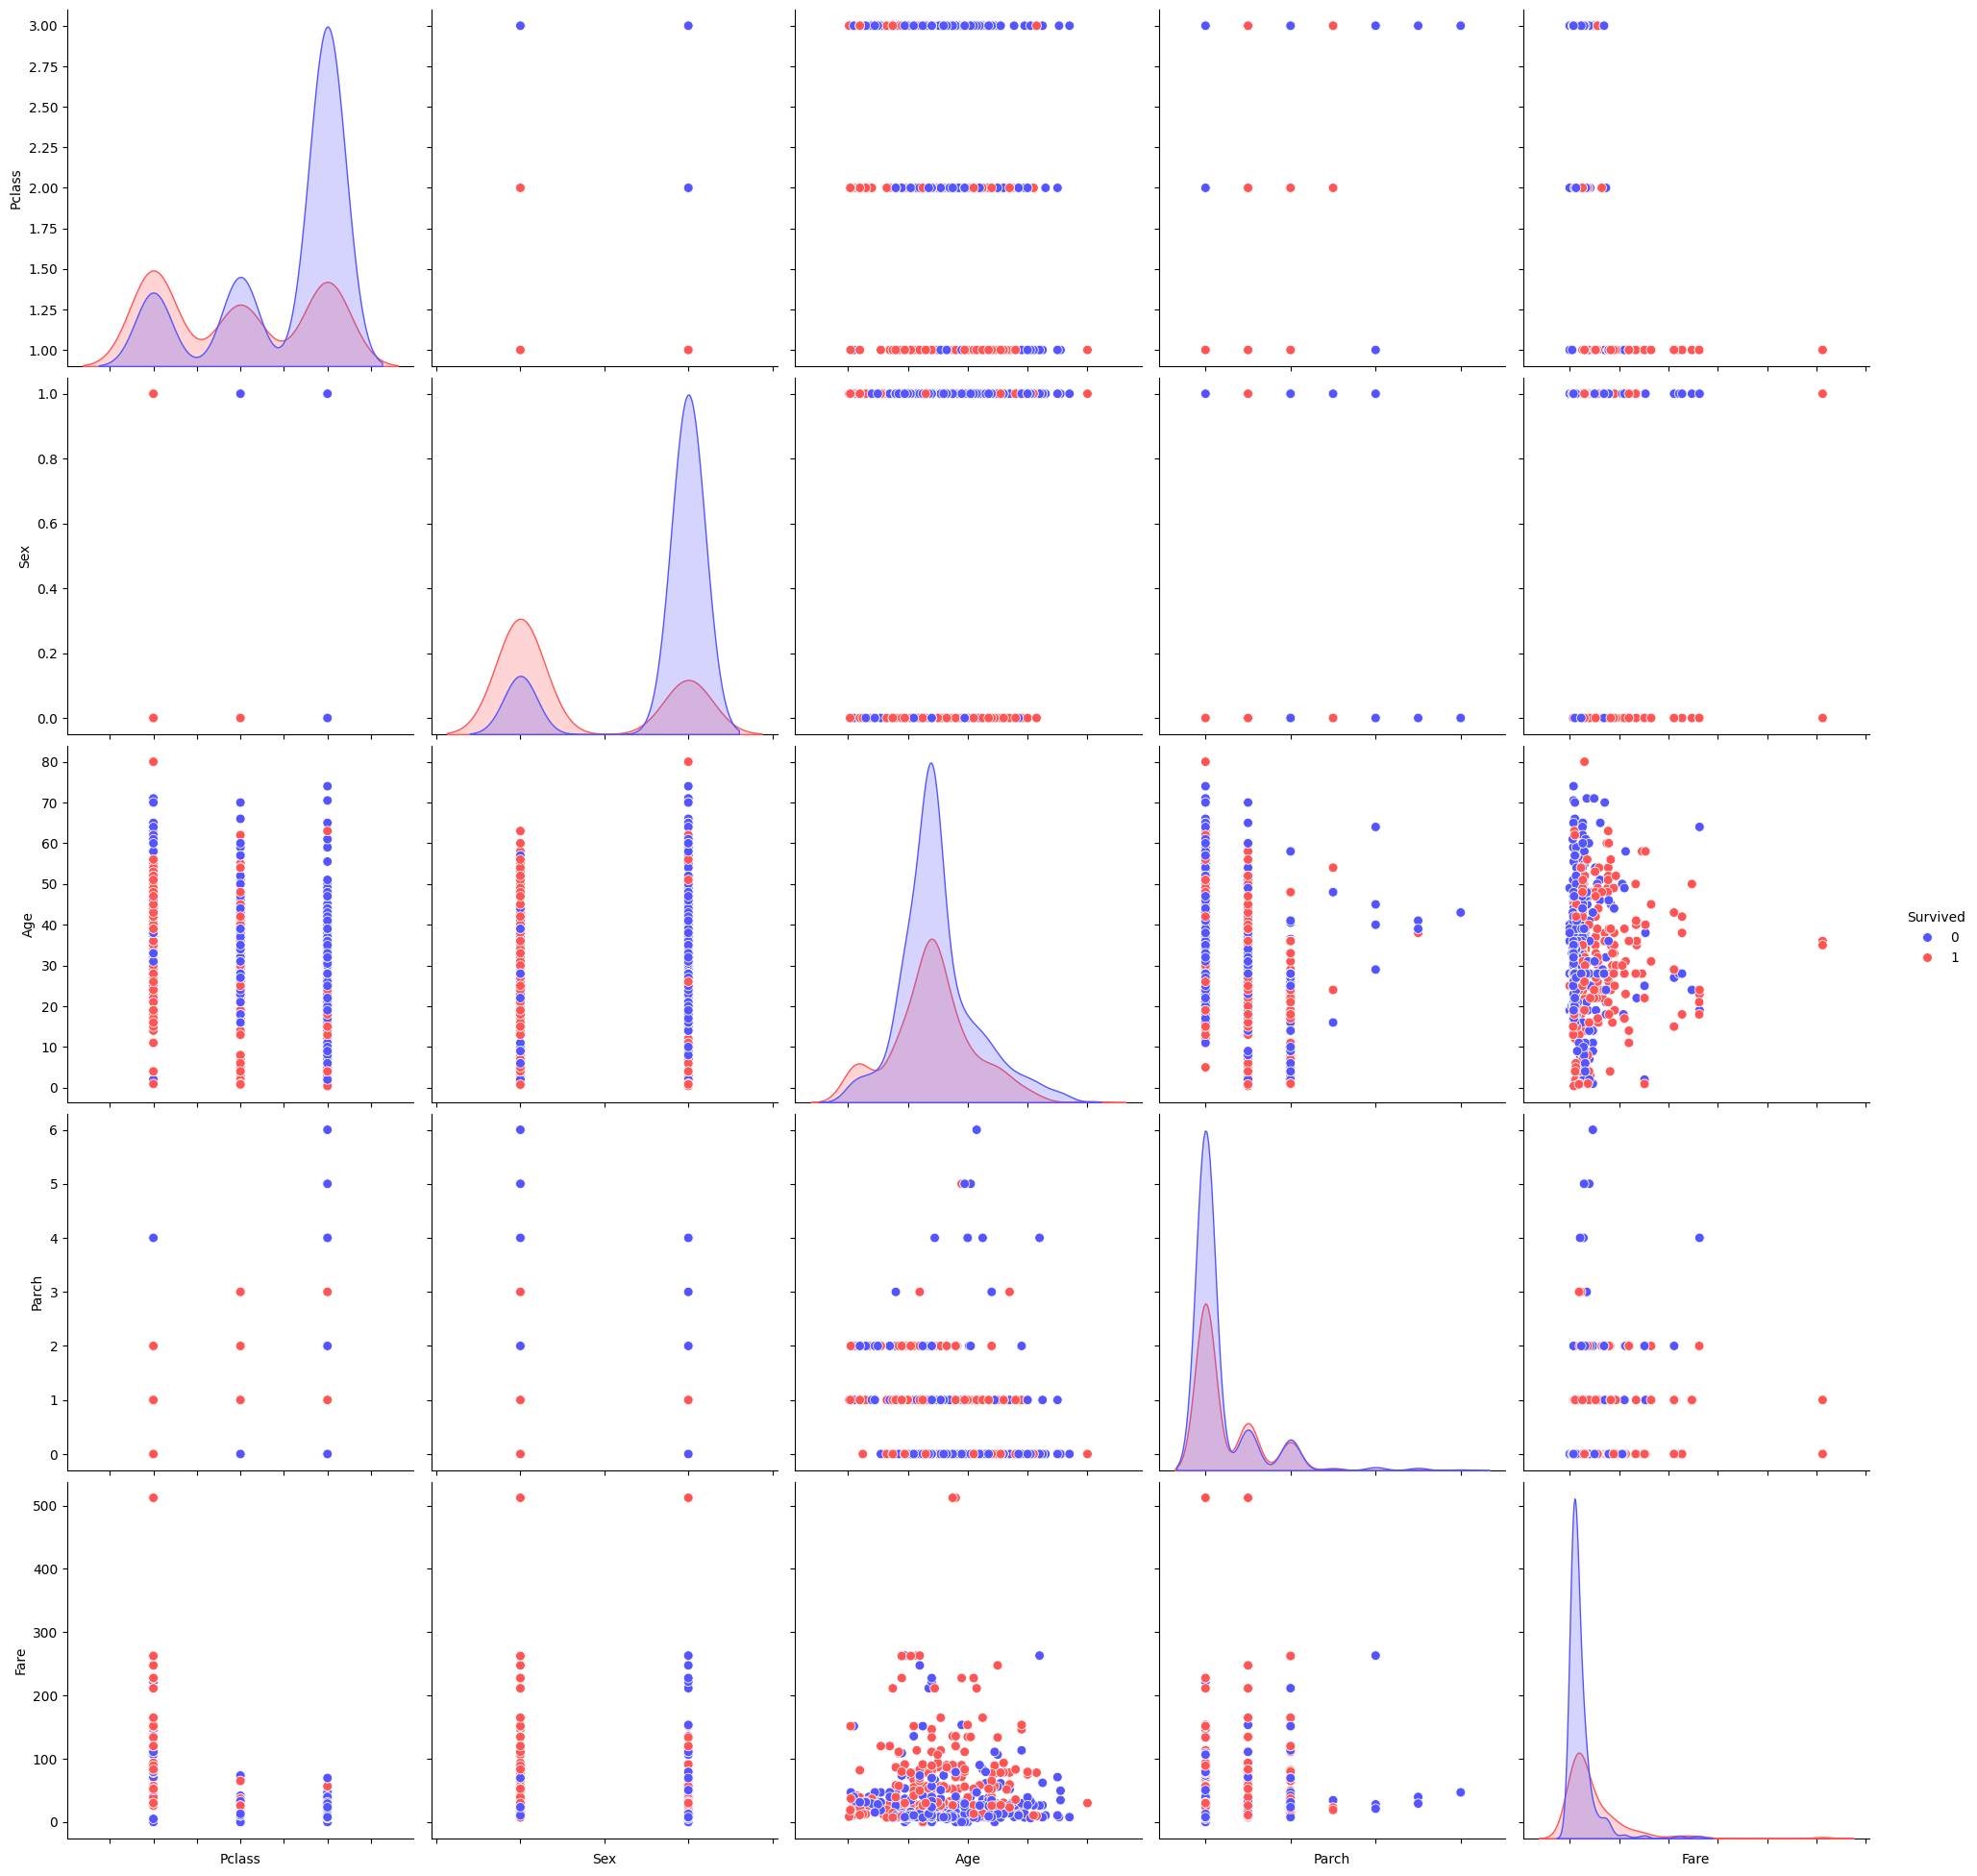

In [30]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [31]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

,AgeBin
0,"(16.0, 32.0]"
1,"(32.0, 48.0]"
2,"(16.0, 32.0]"
3,"(32.0, 48.0]"
4,"(32.0, 48.0]"


Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [32]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [33]:
Data["FareBin"] = pd.qcut(Data["Fare"], 4)

In [34]:
label = LabelEncoder()
Data['FareBin_Code'] = label.fit_transform(Data['FareBin'])

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [61]:
Data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,"(16.0, 32.0]",1,"(-0.001, 7.896]",0,23,2,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,True,False,False,"(32.0, 48.0]",2,"(31.0, 512.329]",3,51,2,0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,"(16.0, 32.0]",1,"(7.896, 14.454]",1,22,1,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,False,False,True,"(32.0, 48.0]",2,"(31.0, 512.329]",3,44,2,0
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,False,False,True,"(32.0, 48.0]",2,"(7.896, 14.454]",1,24,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Montvila; Rev. Juozas,1,27.0,0,0,211536,13.0000,NaN,False,False,True,"(16.0, 32.0]",1,"(7.896, 14.454]",1,21,1,1
887,1,1,Graham; Miss. Margaret Edith,0,19.0,0,0,112053,30.0000,B42,False,False,True,"(16.0, 32.0]",1,"(14.454, 31.0]",2,28,1,1
888,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,False,False,True,"(16.0, 32.0]",1,"(14.454, 31.0]",2,40,4,0
889,1,1,Behr; Mr. Karl Howell,1,26.0,0,0,111369,30.0000,C148,True,False,False,"(16.0, 32.0]",1,"(14.454, 31.0]",2,21,1,1


In [60]:
Data["NameLen"] = Data["Name"].str.len()
Data["FamilySize"] = Data["Parch"] + Data["SibSp"] + 1
Data["IsAlone"] = (Data["FamilySize"] == 1).astype(int)

**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

<Axes: title={'center': 'Pearson Correlation of Features'}>

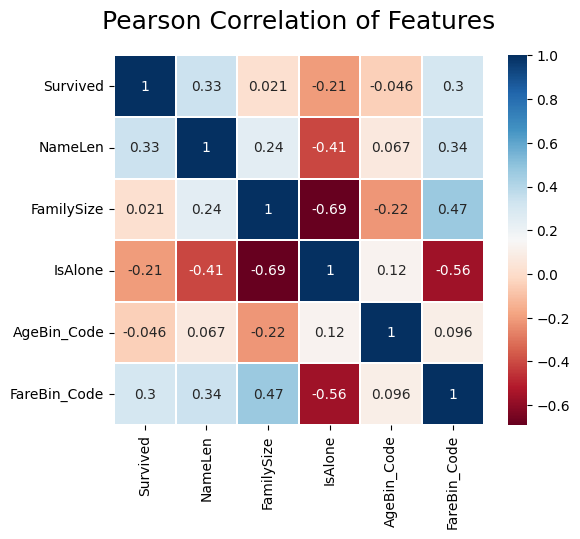

In [65]:
All = Data[['Survived', 'NameLen', 'FamilySize', 'IsAlone', 'AgeBin_Code', 'FareBin_Code']]
colormap = plt.cm.RdBu

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(All[All.Survived!=-1].astype(float).corr(),
            linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)